In [13]:
# https://self-development.info/easyocr%E3%82%92%E3%82%A4%E3%83%B3%E3%82%B9%E3%83%88%E3%83%BC%E3%83%AB%E3%81%97%E3%81%A6python%E3%81%A7%E6%96%87%E5%AD%97%E8%AA%8D%E8%AD%98%E3%82%92%E8%A1%8C%E3%81%86/

In [14]:
!pip install easyocr

In [15]:
import easyocr
 
image_path = 'data/sample.jpg'
# 言語選択（デフォルトでGPU利用、CPUのみの場合はgpu=False）
reader = easyocr.Reader(['ja','en'], gpu=True)
# 画像読み込み＝文字認識
result = reader.readtext(image_path)#, detail=0)
 
# print(result)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


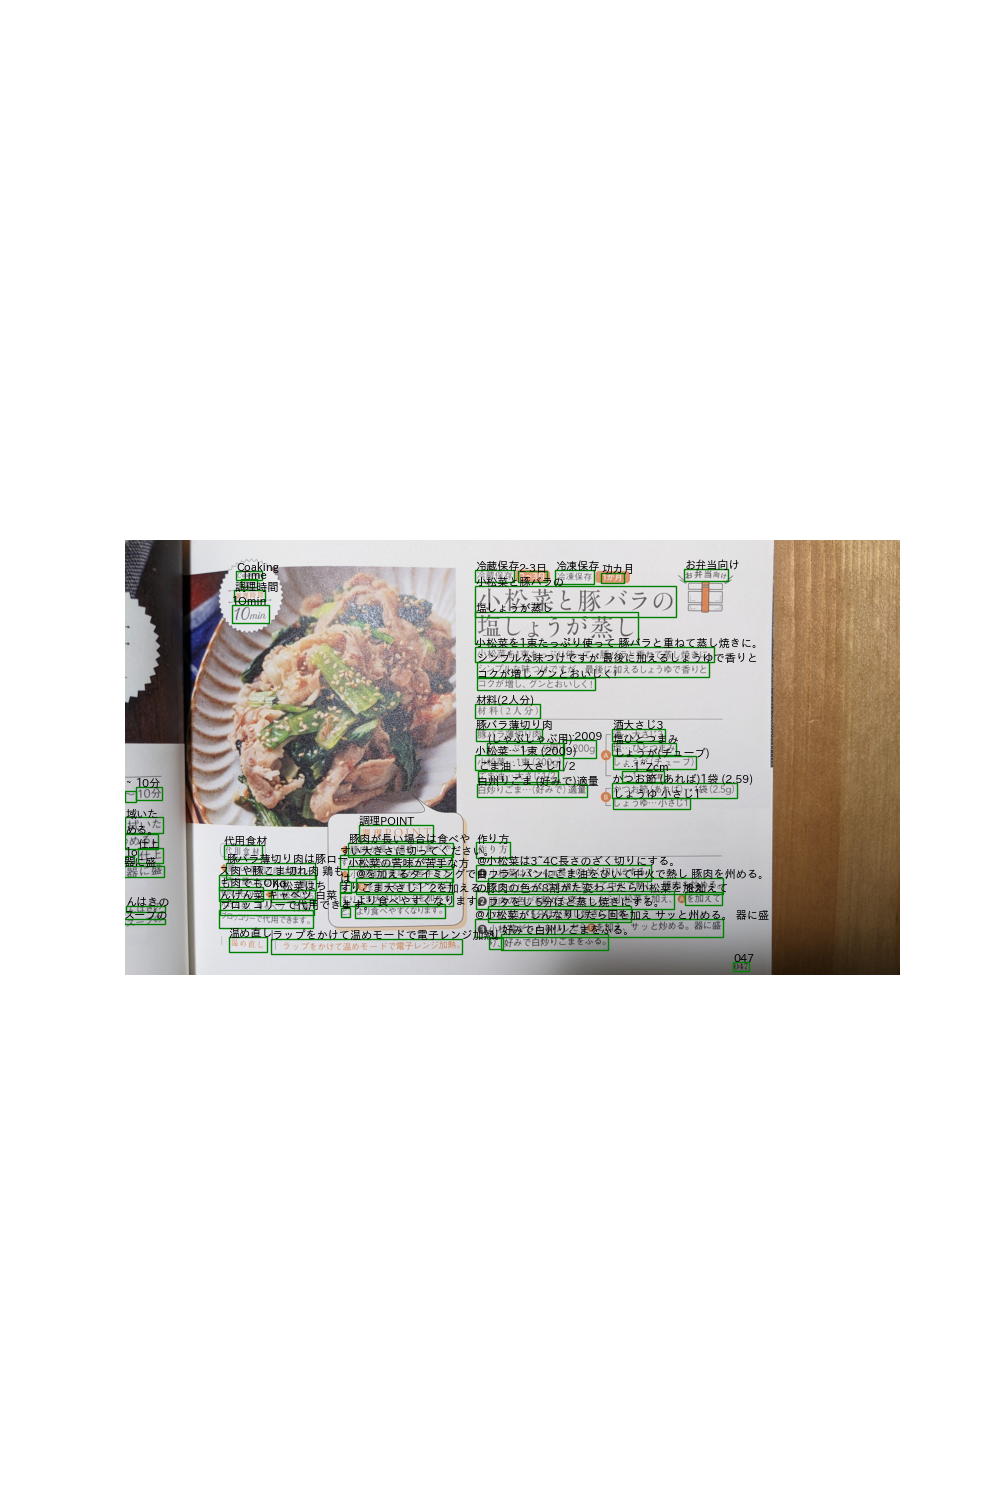

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.patches as patches
import japanize_matplotlib
%matplotlib widget

image = Image.open(image_path)

fig = plt.figure(figsize = (10,15))
ax = plt.axes()
ax.imshow(image)
ax.axis("off")
for t in result:
    try:
        bbox = np.array(t[0])
        # print(t[1])
        ax.text(bbox[0,0], bbox[0,1], t[1], size=8,color="black")
        r = patches.Rectangle(
            xy=(bbox[0,0], bbox[0,1]), width=(bbox[2,0] - bbox[0,0]), height=(bbox[2,1] - bbox[0,1]), 
            ec='g', fill=False,linewidth=1.0
        )
        ax.add_patch(r)
    except:
        continue
plt.savefig('data/result.png')
plt.show()